### Import required libraries

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the data 

In [30]:
churn=pd.read_csv("churn_dataset.csv")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check the shape of the data

In [31]:
churn.shape

(7043, 21)

### Check information about the data

In [33]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### Check duplicates 

In [34]:
churn.duplicated().sum()

0

### Check null values

In [35]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Check unique values

In [36]:
churn.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

### Removing unwanted values

In [32]:
churn=churn[churn["TotalCharges"] != " "]
churn["TotalCharges"]=churn["TotalCharges"].astype(float)

### Check the statistical description

In [37]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Check correlation

In [38]:
churn.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


### Univariate Numerical Analysis

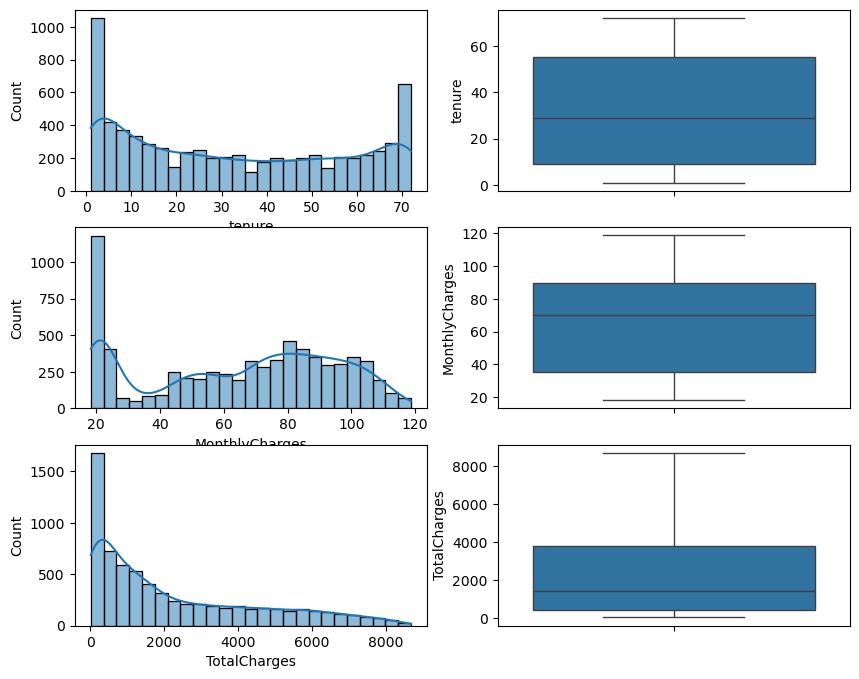

In [39]:
plt.figure(figsize=(10,8))
plt.subplot(3,2,1)
sns.histplot(churn["tenure"], bins=25, kde=True)
plt.subplot(3,2,2)
sns.boxplot(churn["tenure"])
plt.subplot(3,2,3)
sns.histplot(churn["MonthlyCharges"], bins=25, kde=True)
plt.subplot(3,2,4)
sns.boxplot(churn["MonthlyCharges"])
plt.subplot(3,2,5)
sns.histplot(churn["TotalCharges"], bins=25, kde=True)
plt.subplot(3,2,6)
sns.boxplot(churn["TotalCharges"])
plt.show()

### Univariate Categorical Analysis

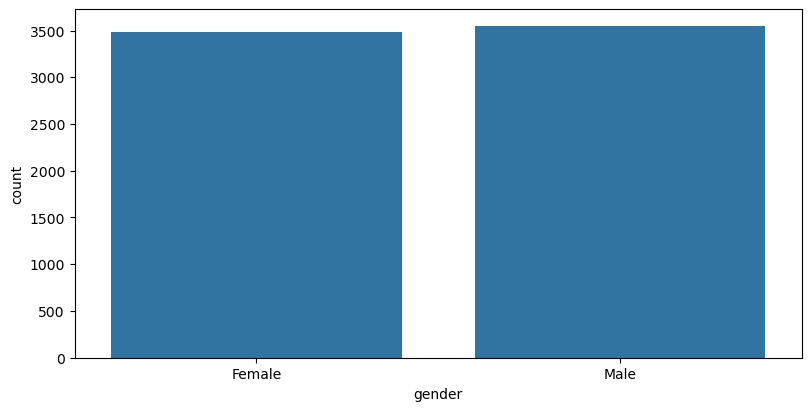

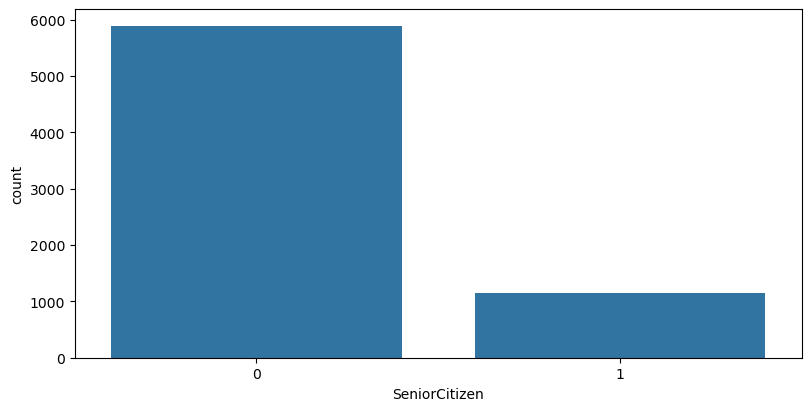

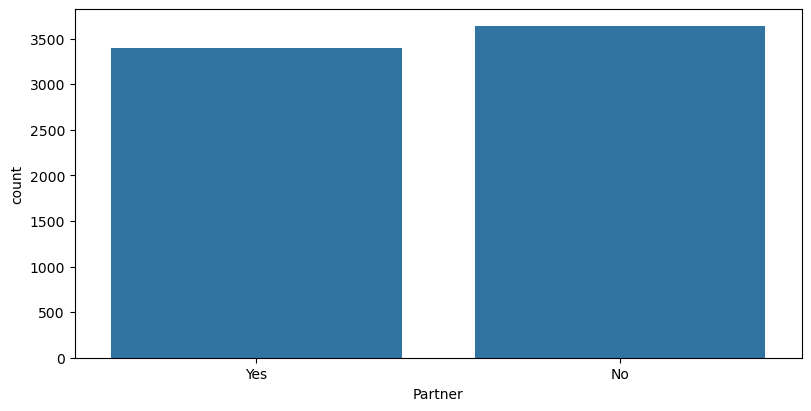

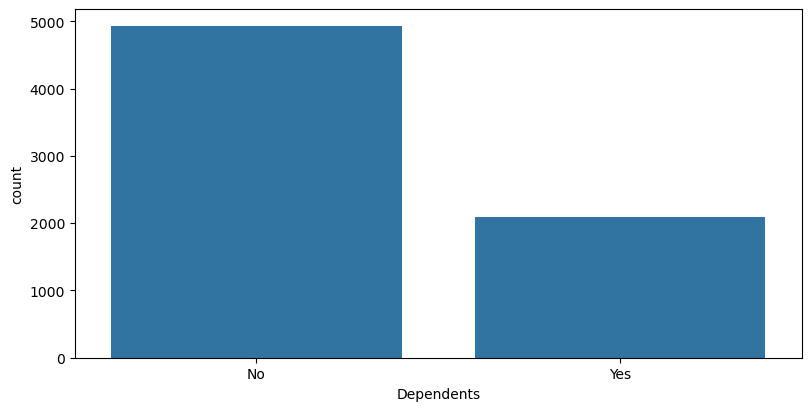

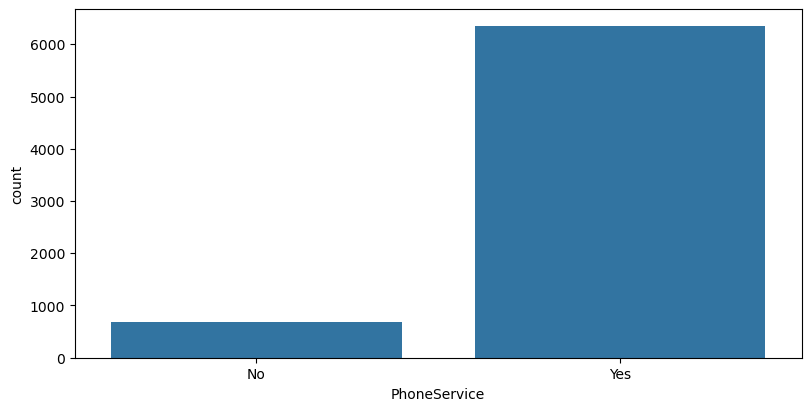

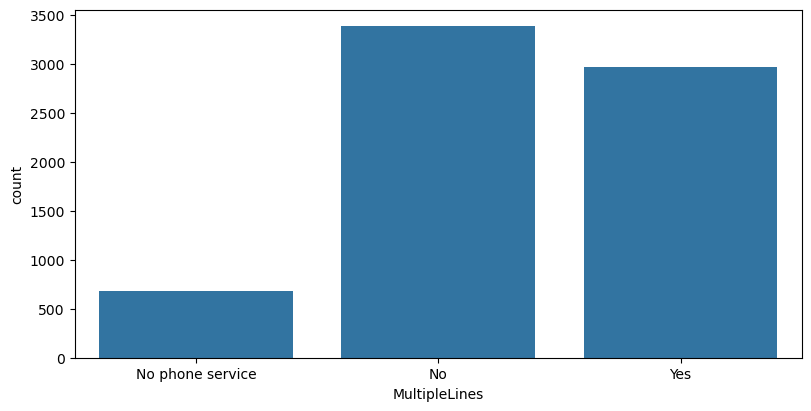

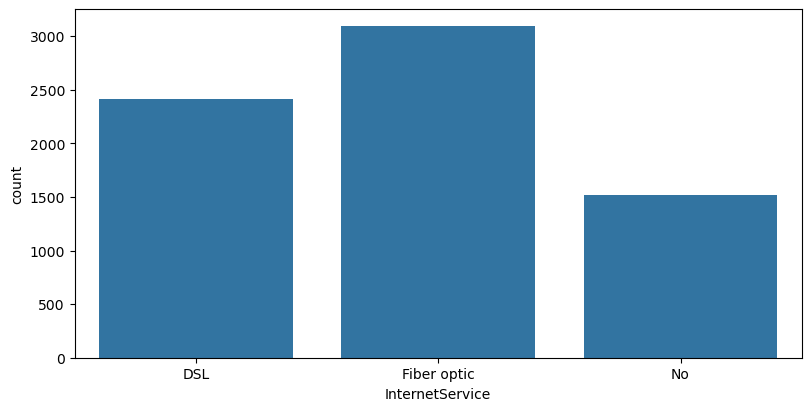

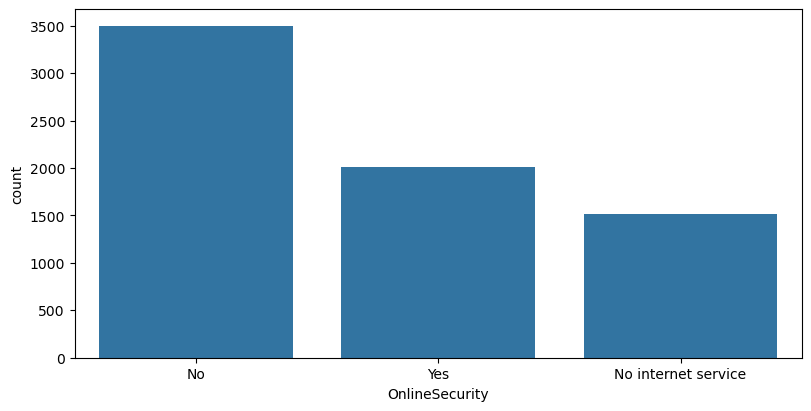

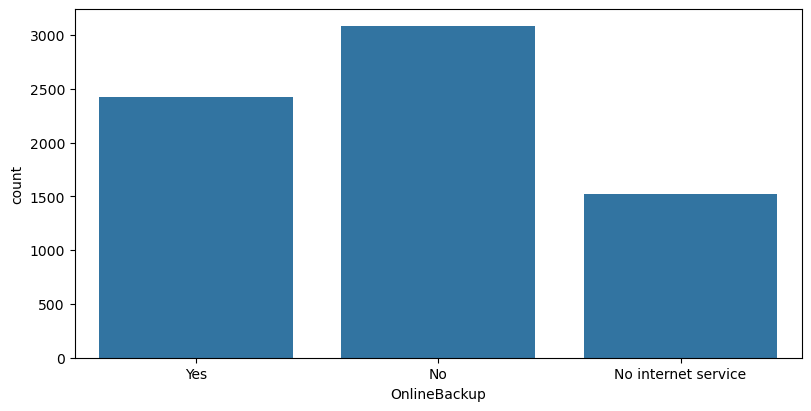

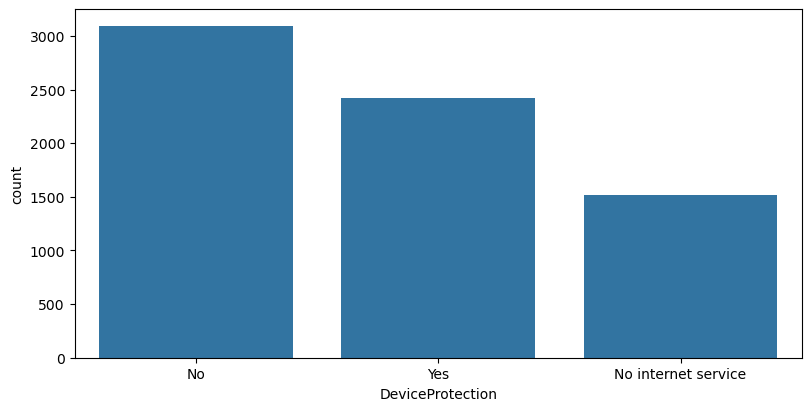

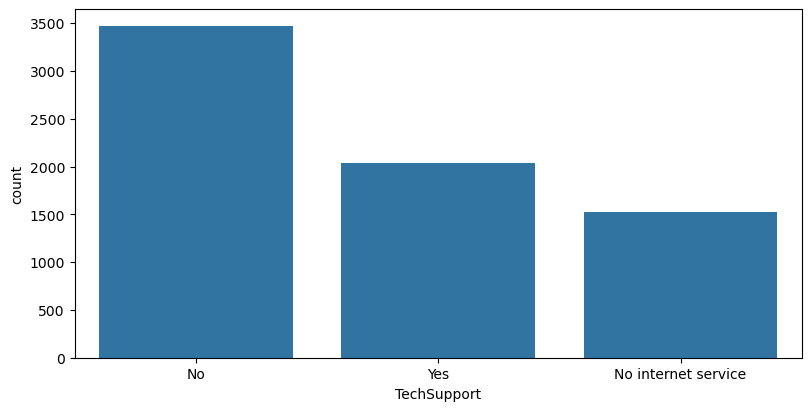

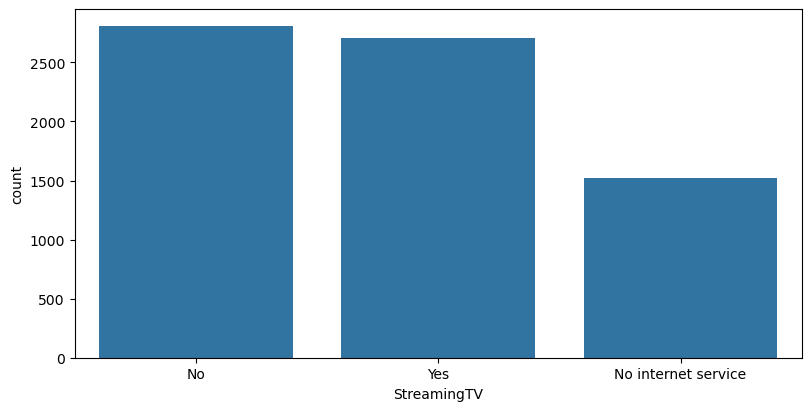

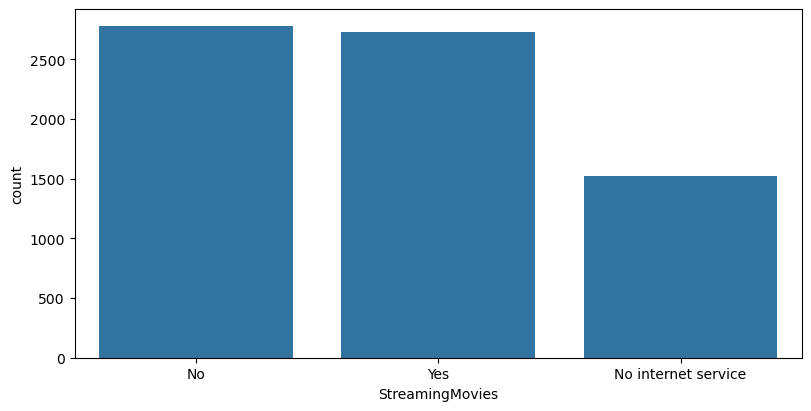

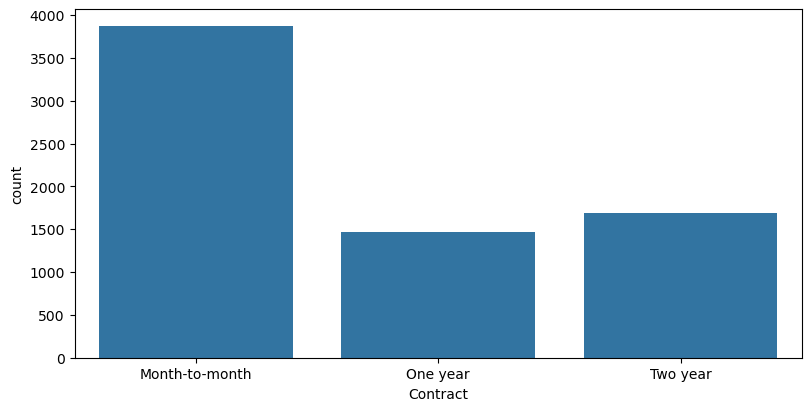

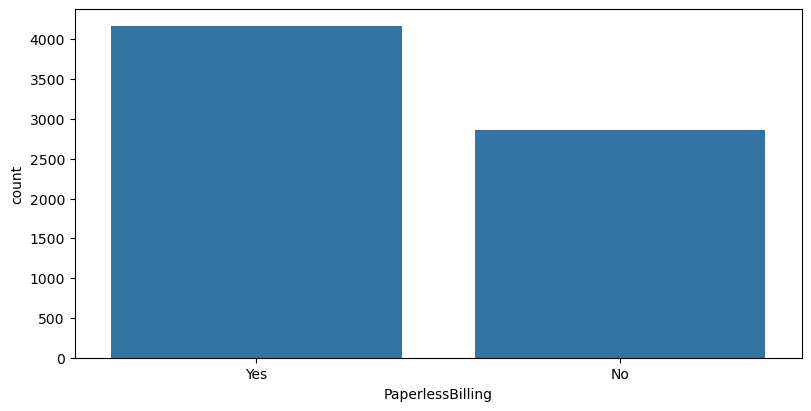

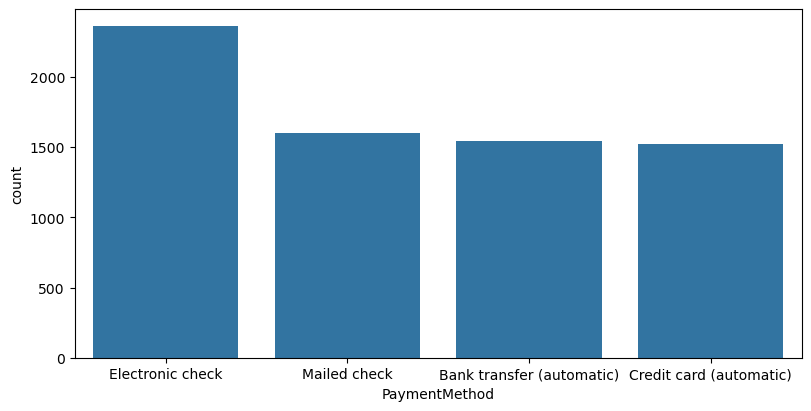

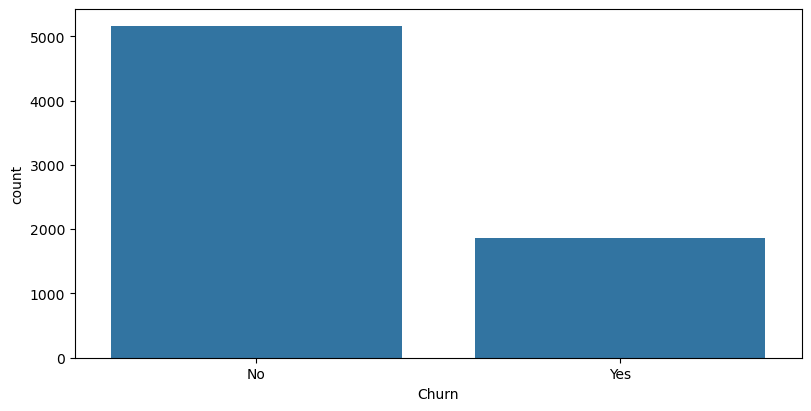

In [40]:
new1=churn.drop(["customerID","tenure","MonthlyCharges","TotalCharges"], axis=1)
for i in new1.columns:
    plt.figure(figsize=(8,4), layout="constrained")
    sns.countplot(x=new1[i])

## Bivariate Analysis
### Numerical vs Numerical

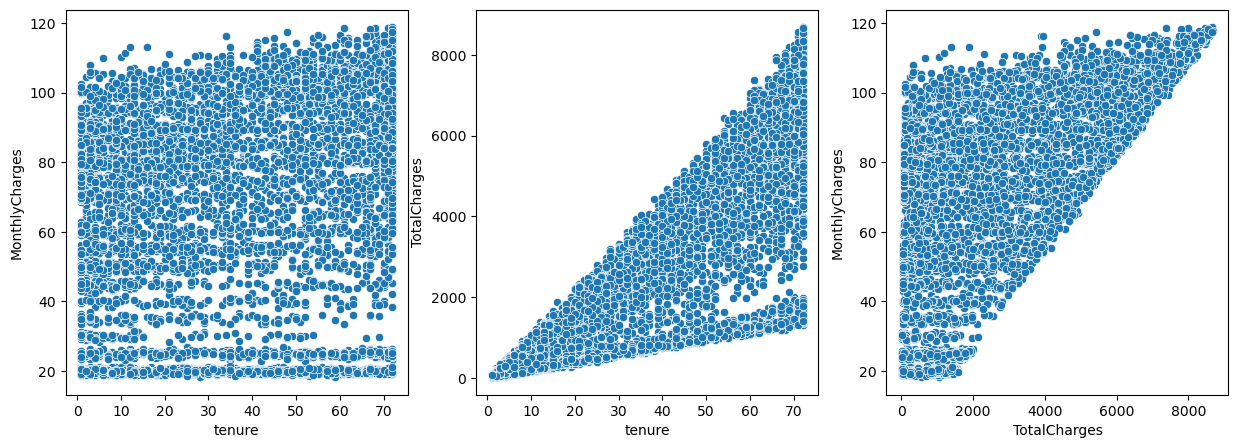

In [41]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x=churn["tenure"], y=churn["MonthlyCharges"])
plt.subplot(1,3,2)
sns.scatterplot(x=churn["tenure"], y=churn["TotalCharges"])
plt.subplot(1,3,3)
sns.scatterplot(x=churn["TotalCharges"], y=churn["MonthlyCharges"])
plt.show()

### Numerical vs Categorical

### Tenure

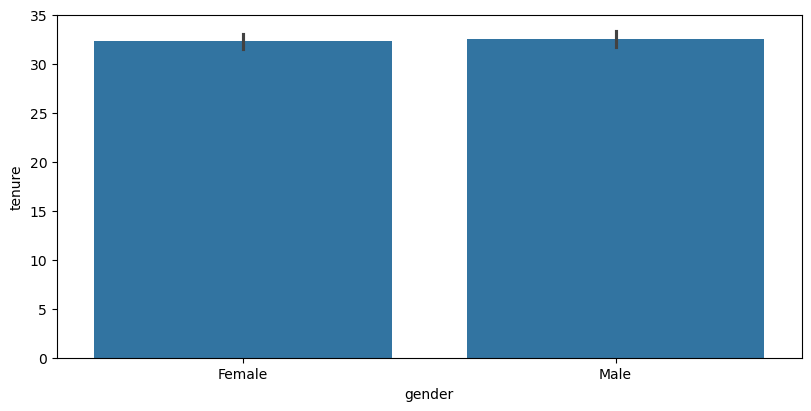

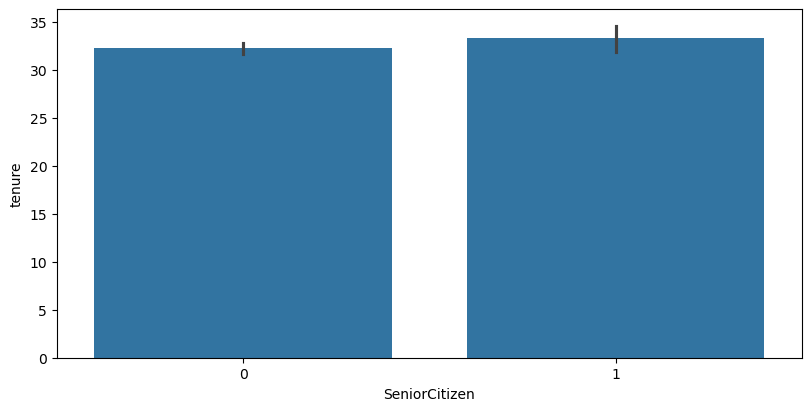

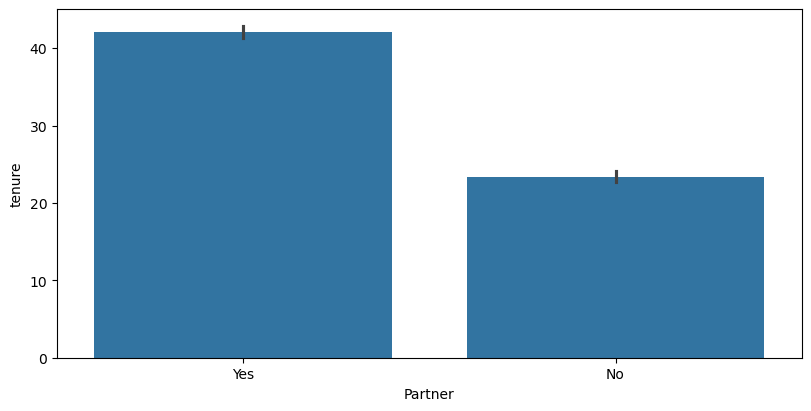

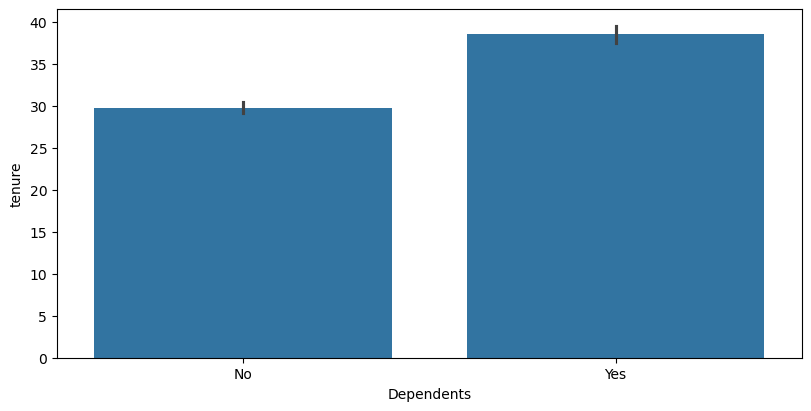

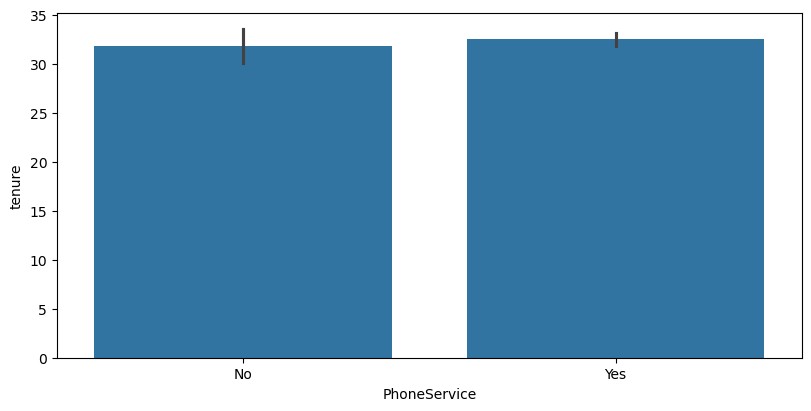

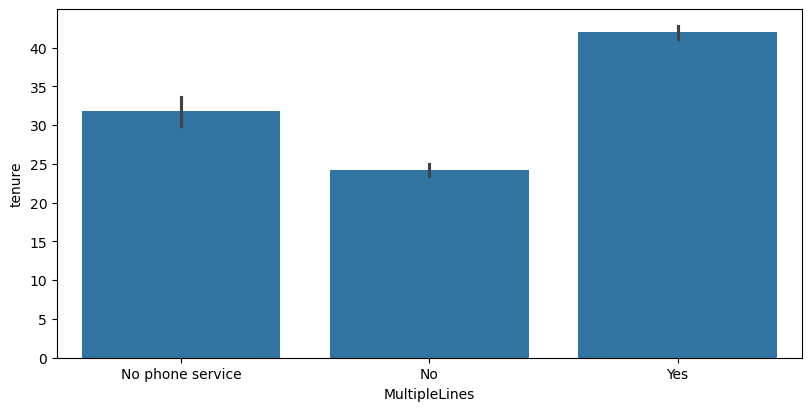

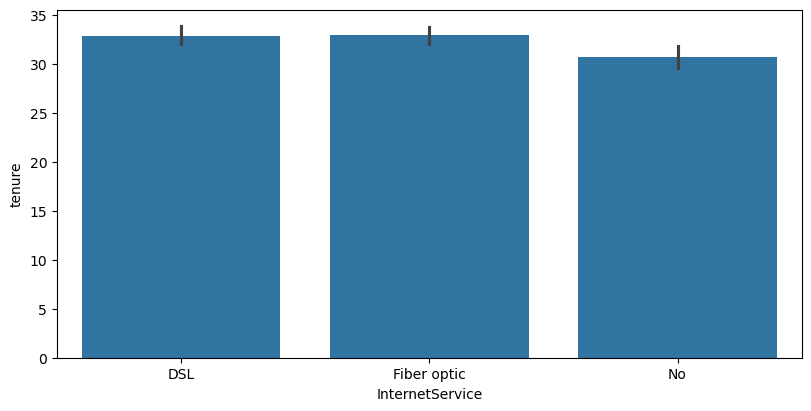

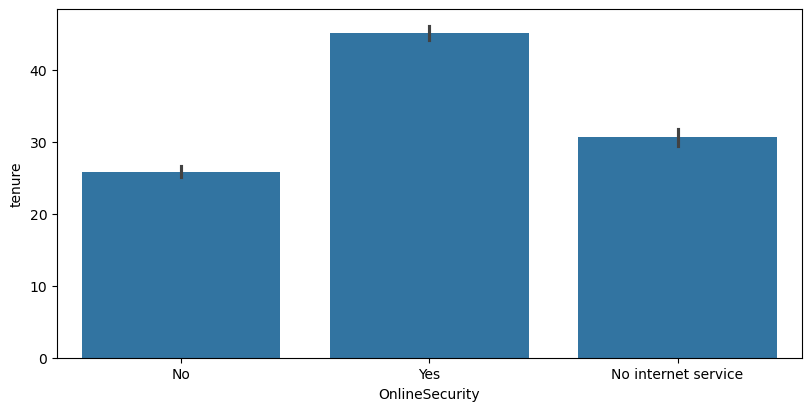

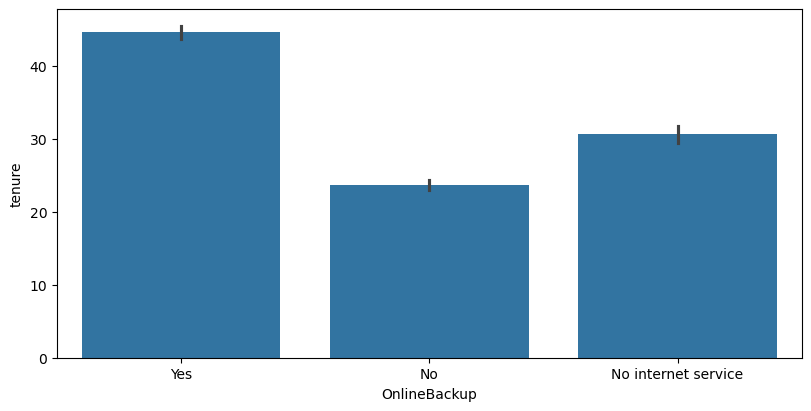

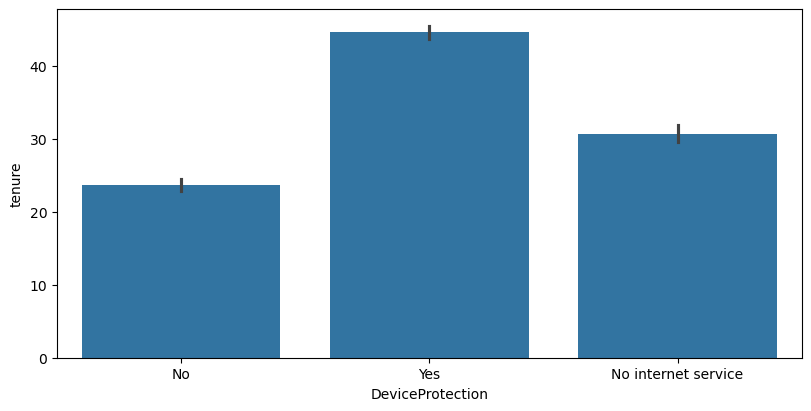

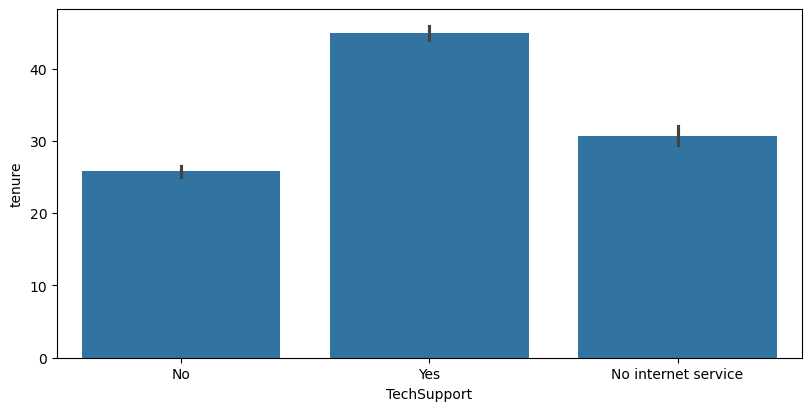

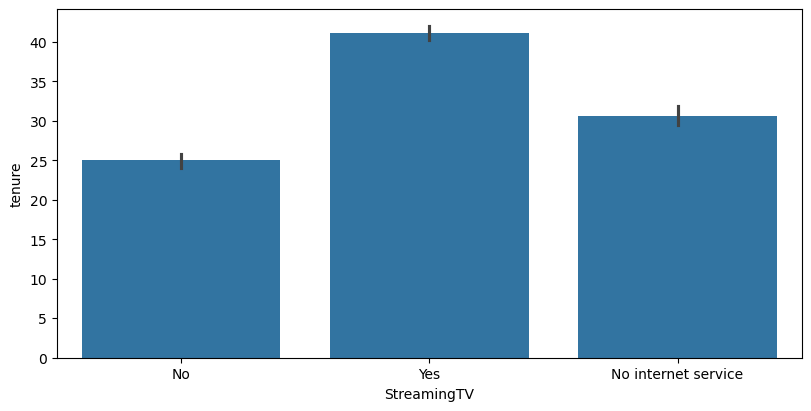

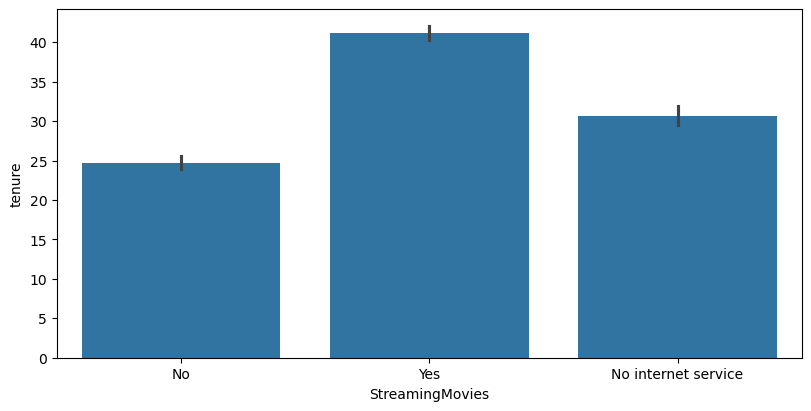

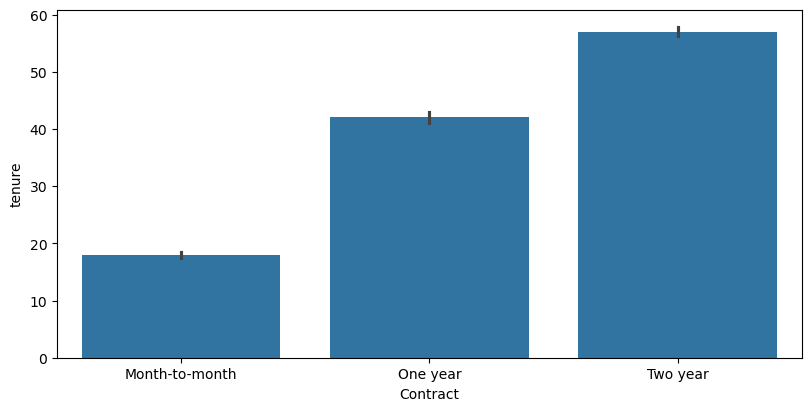

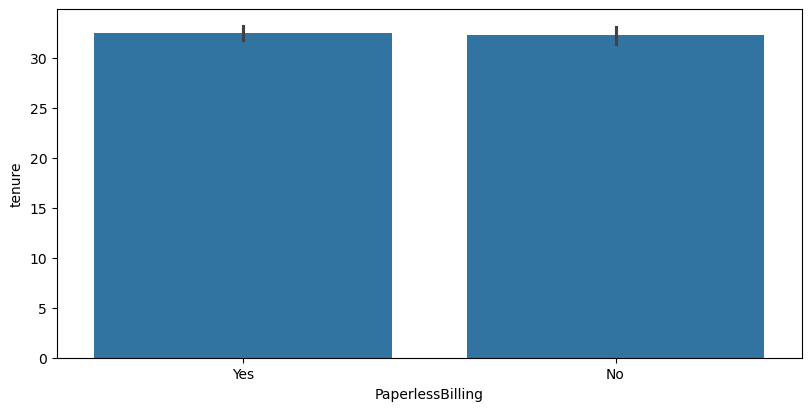

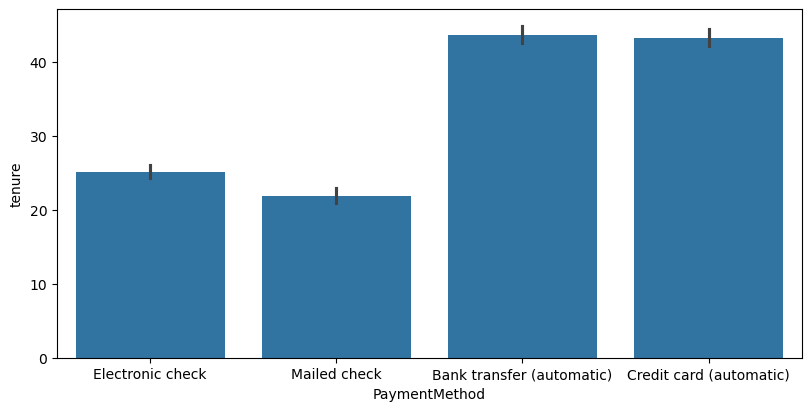

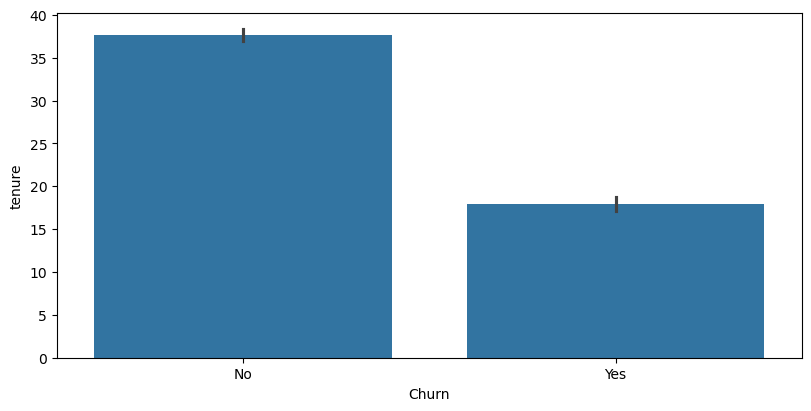

In [42]:
new1=churn.drop(["customerID","tenure","MonthlyCharges","TotalCharges"], axis=1)
for i in new1.columns:
    plt.figure(figsize=(8,4), layout="constrained")
    sns.barplot(x=new1[i], y=churn["tenure"])

### MonthlyCharges

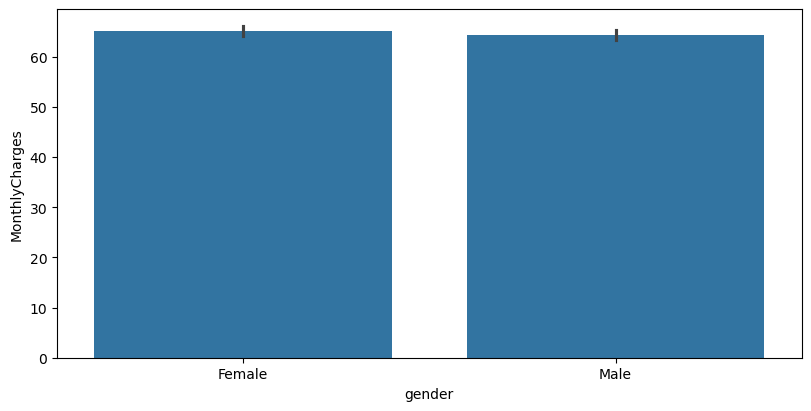

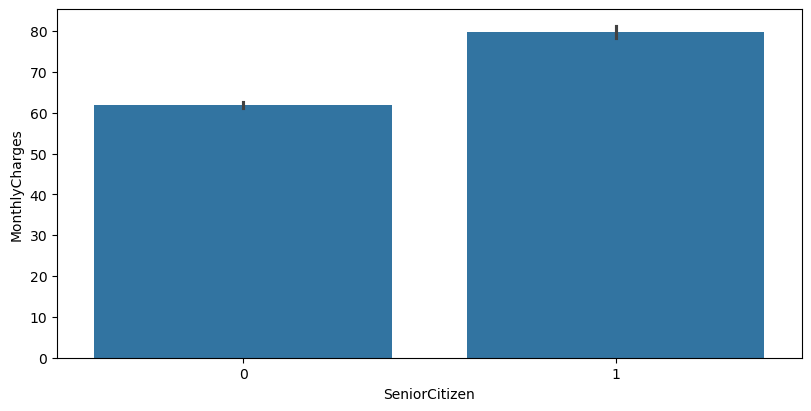

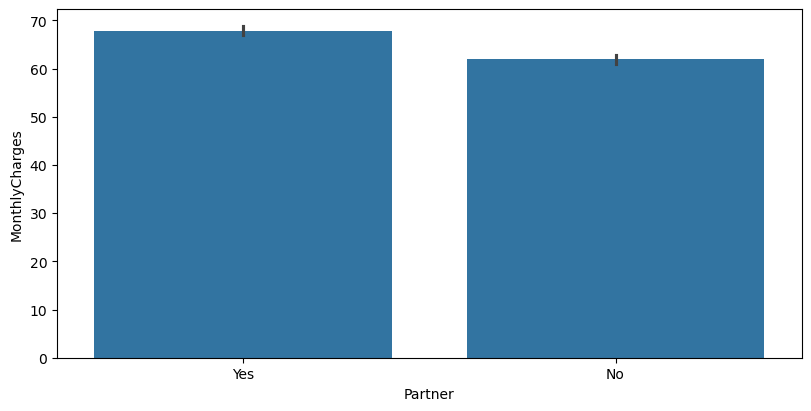

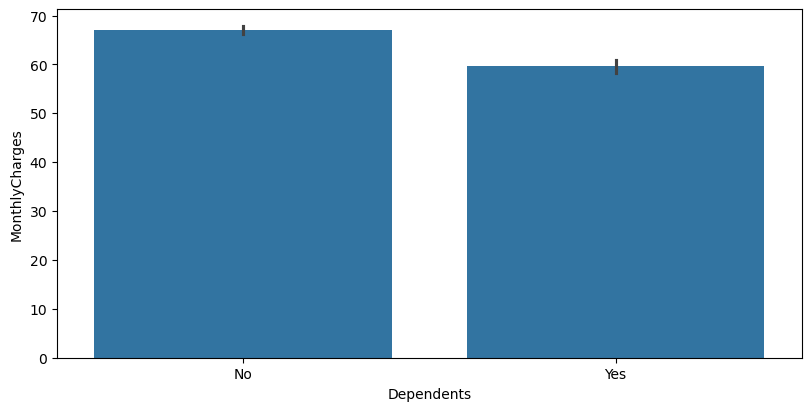

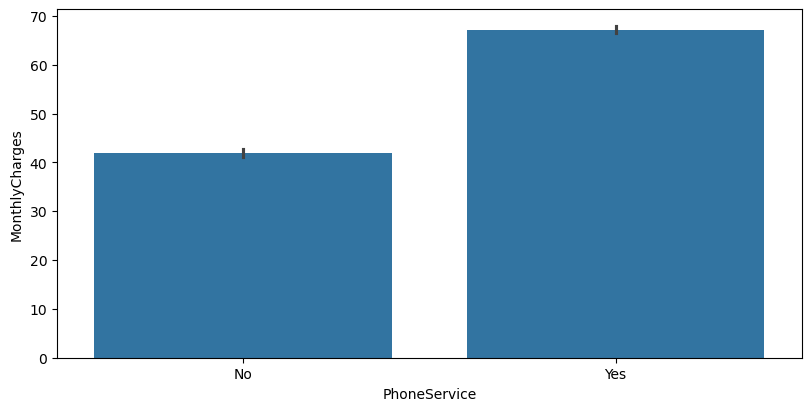

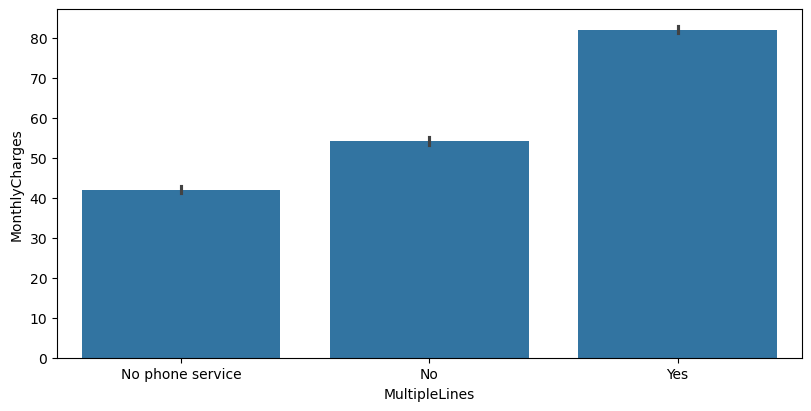

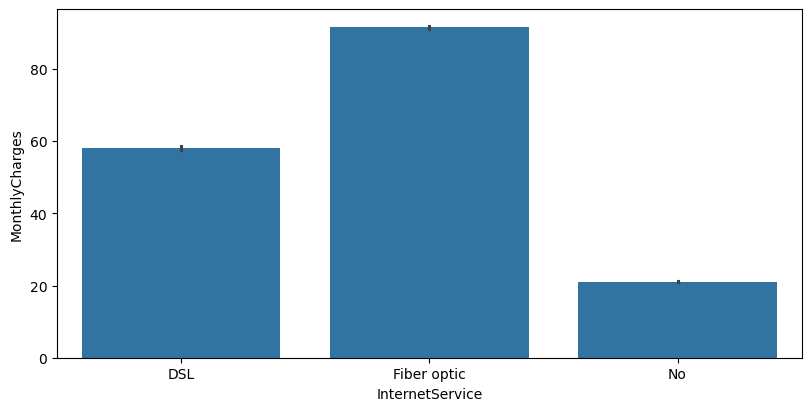

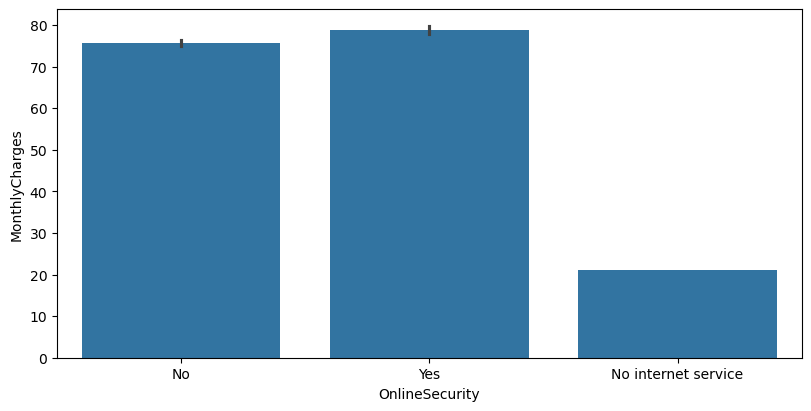

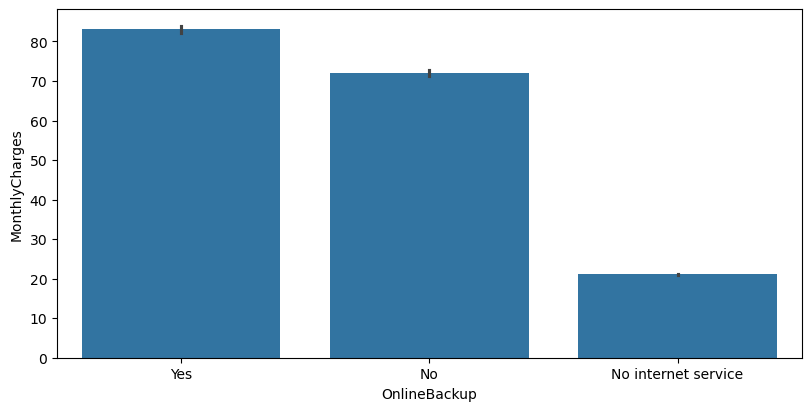

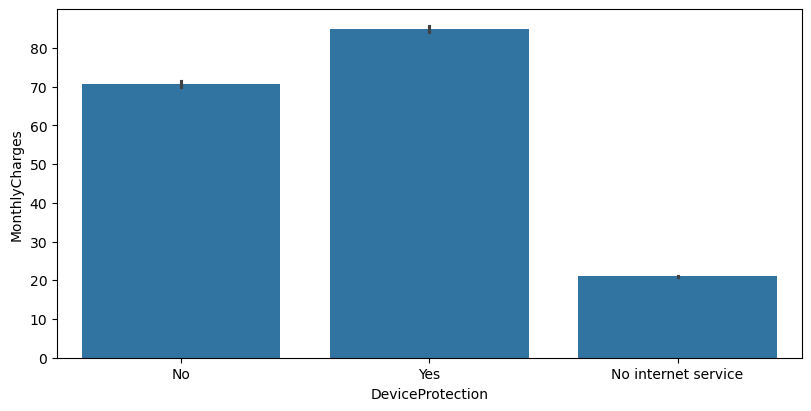

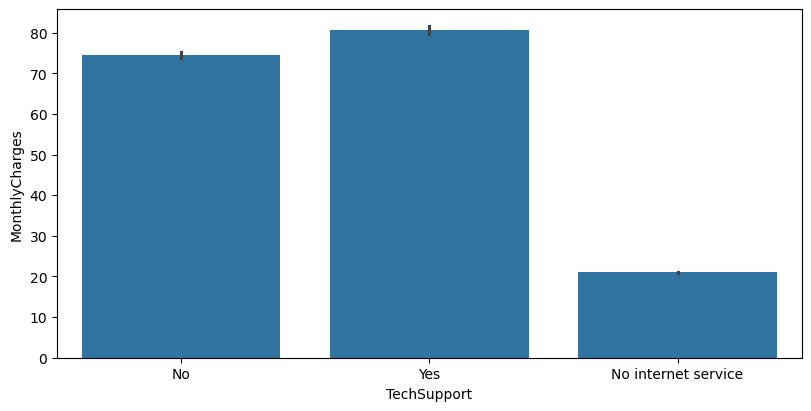

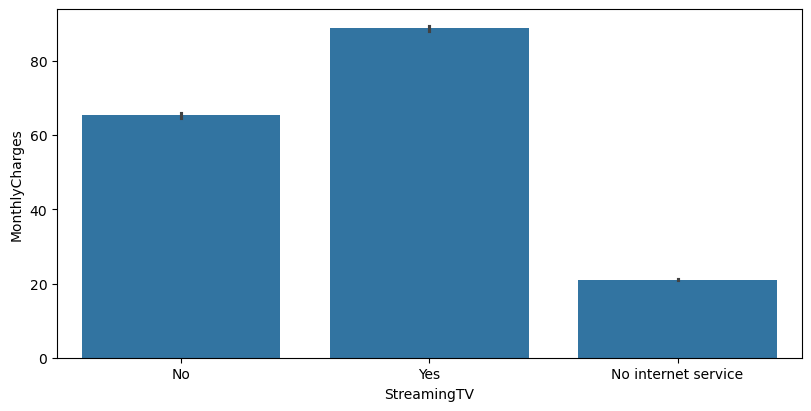

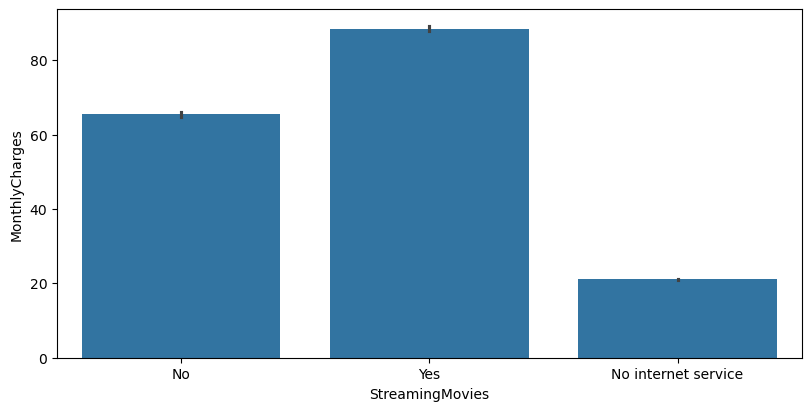

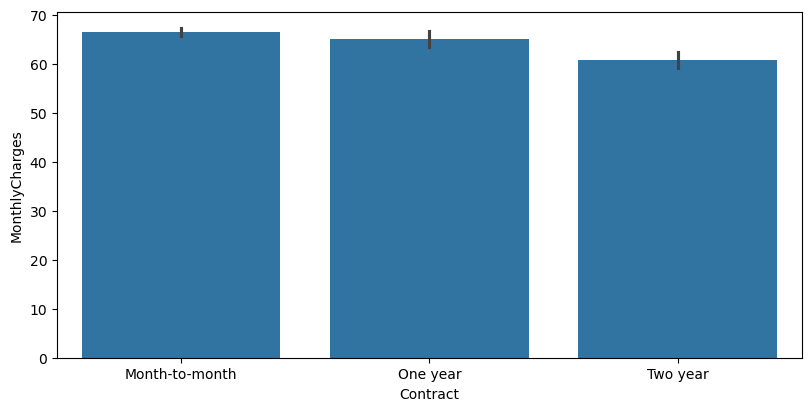

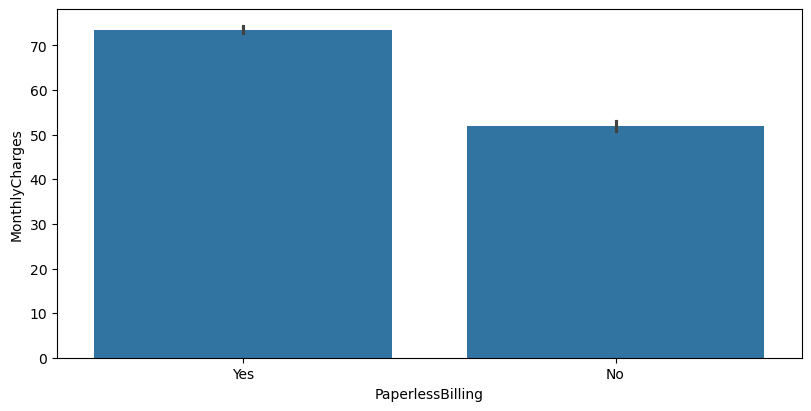

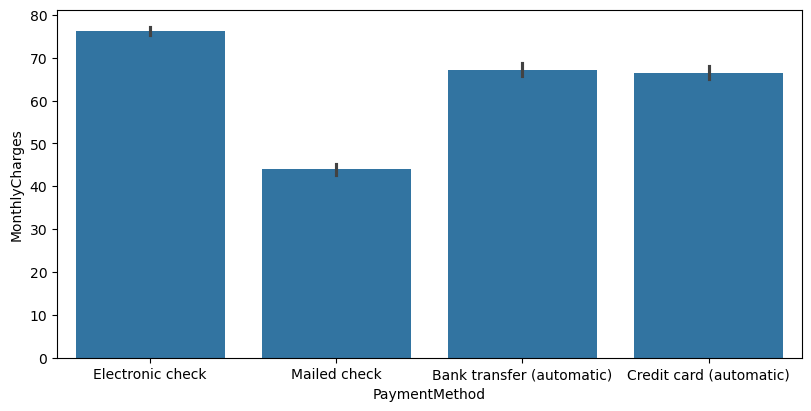

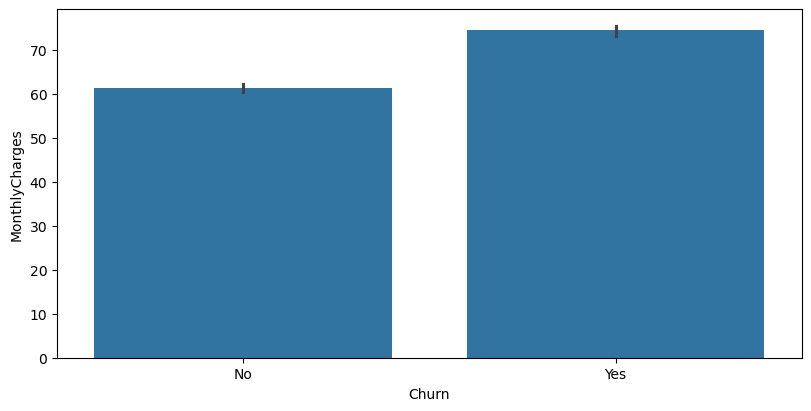

In [43]:
for i in new1.columns:
    plt.figure(figsize=(8,4), layout="constrained")
    sns.barplot(x=new1[i], y=churn["MonthlyCharges"])

### Total Charges

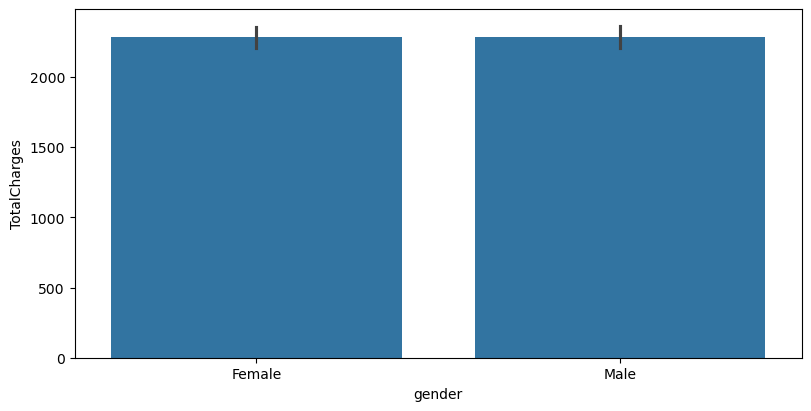

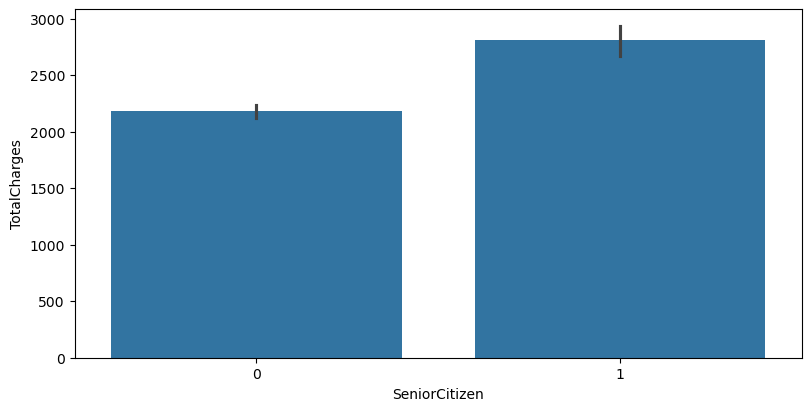

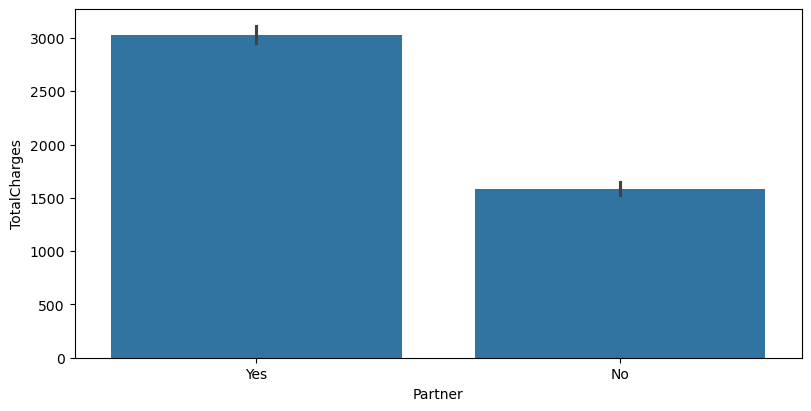

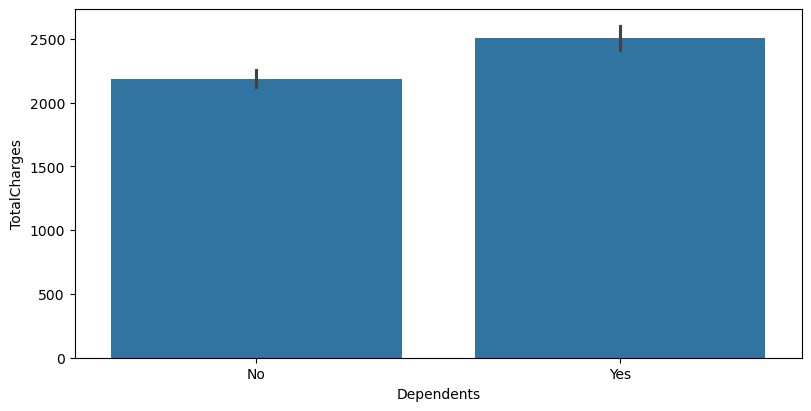

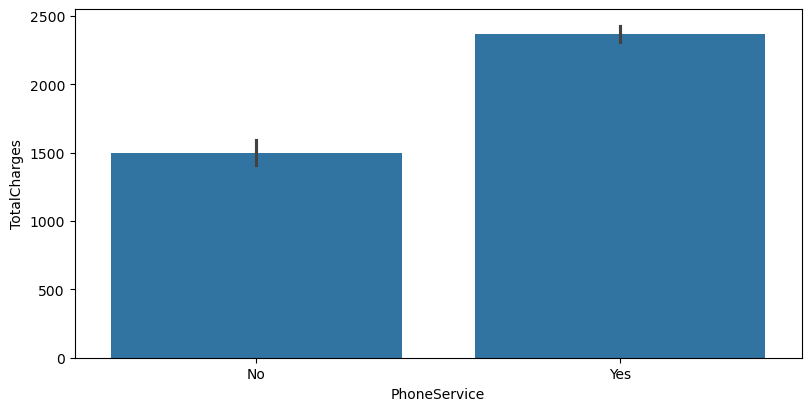

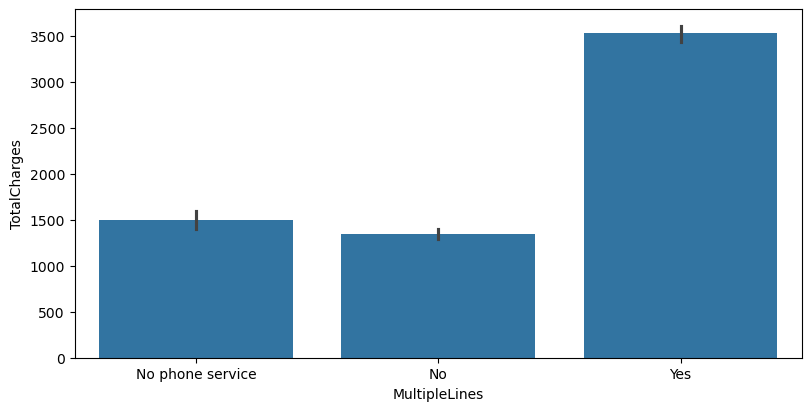

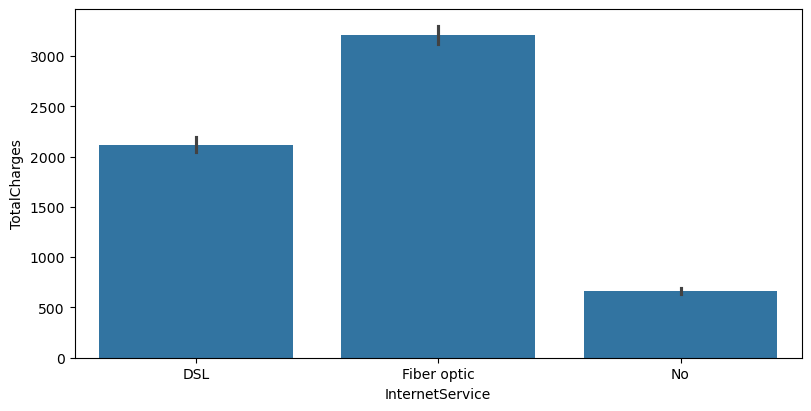

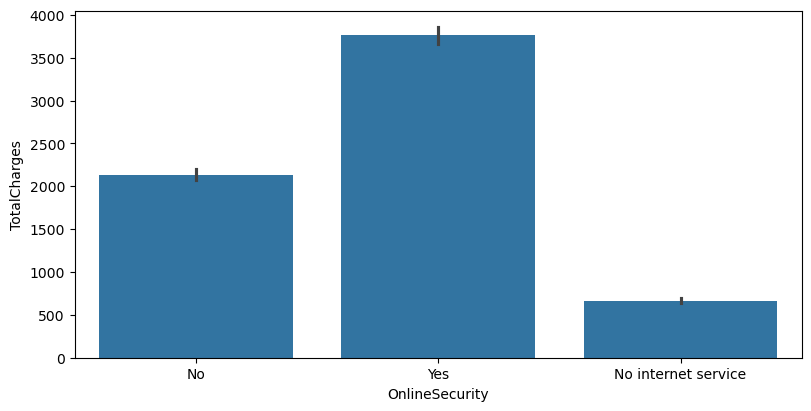

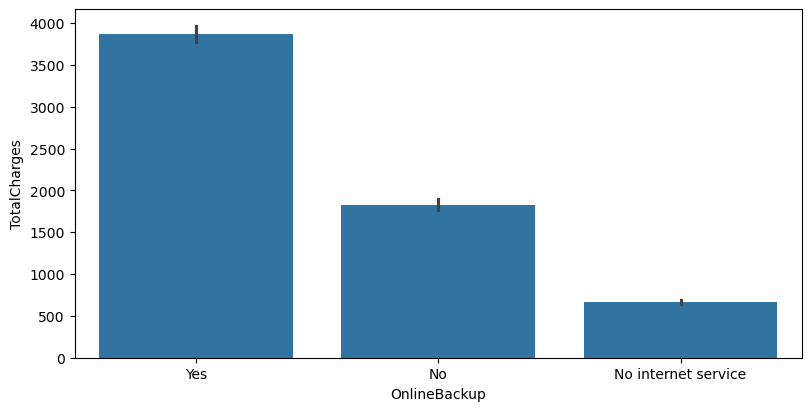

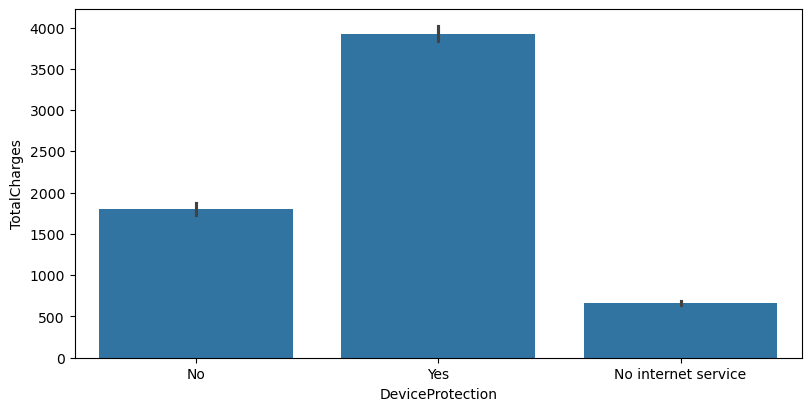

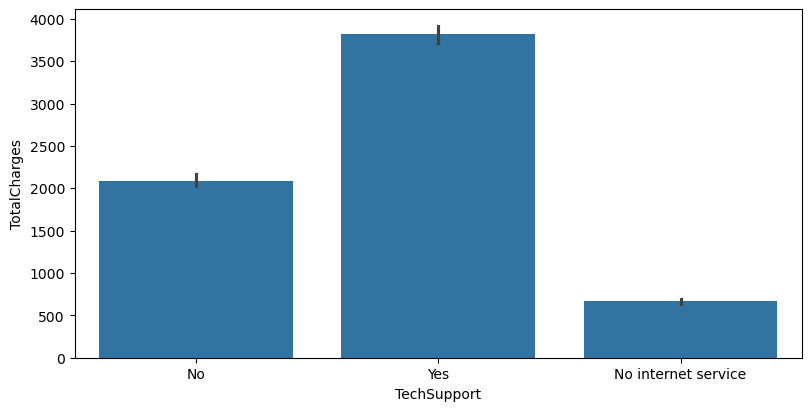

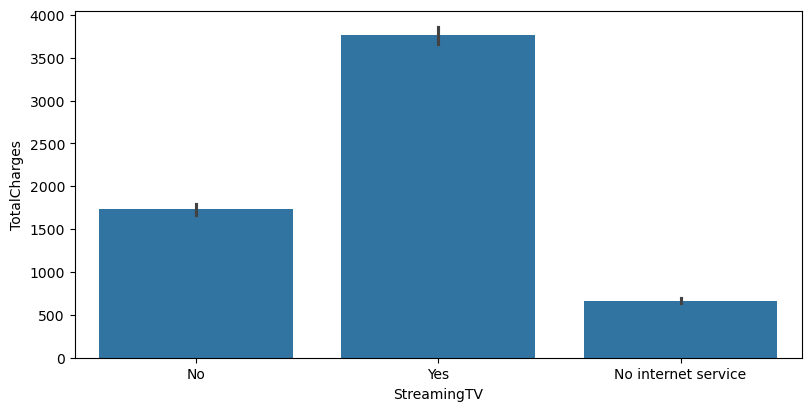

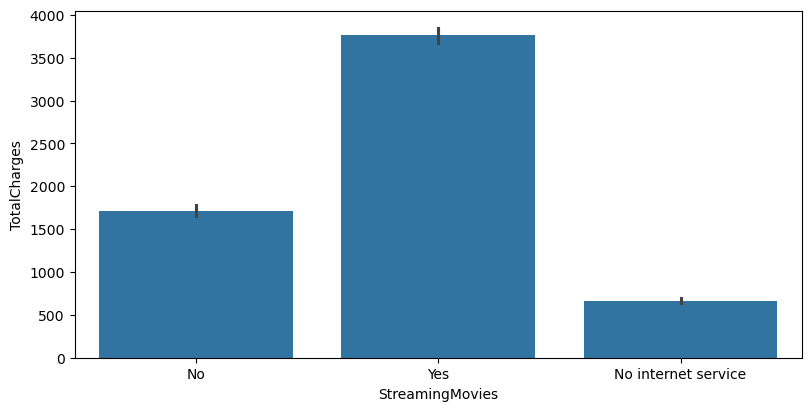

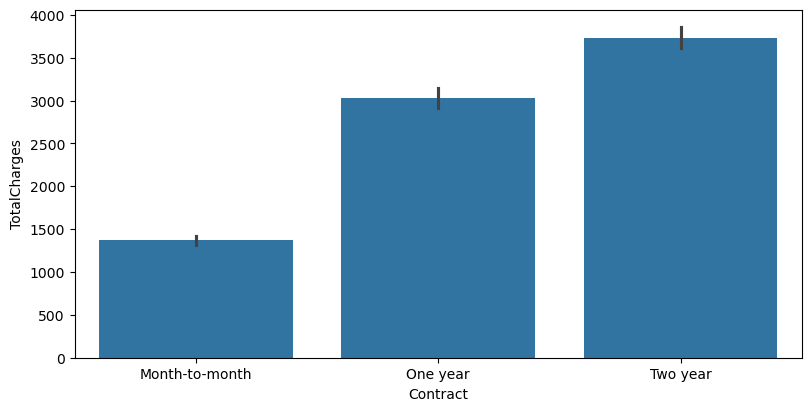

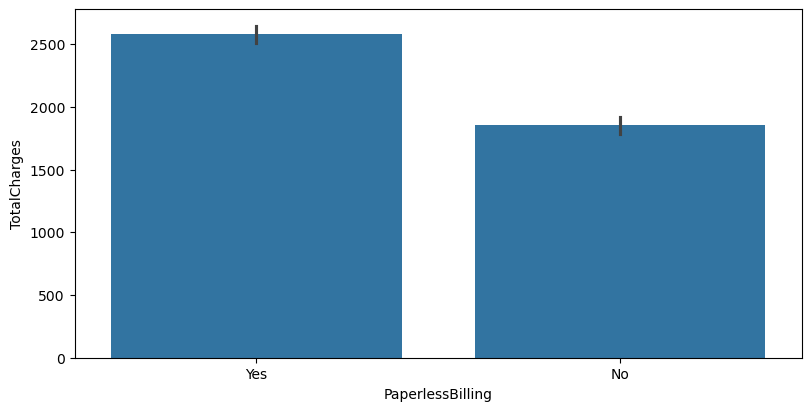

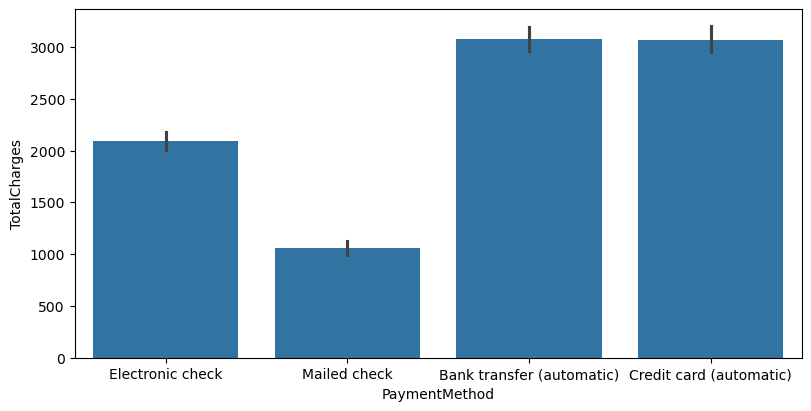

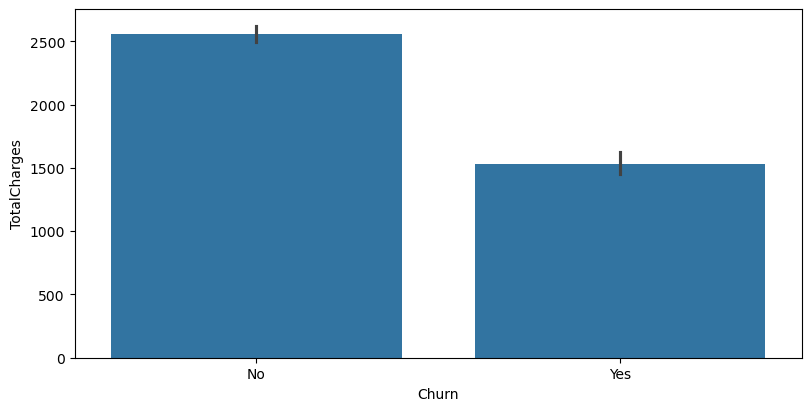

In [44]:
for i in new1.columns:
    plt.figure(figsize=(8,4), layout="constrained")
    sns.barplot(x=new1[i], y=churn["TotalCharges"])

### Categorical vs Categorical

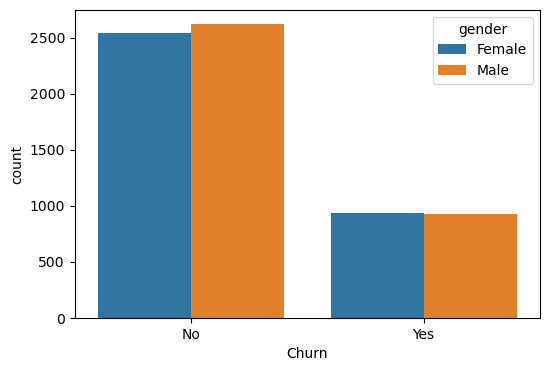

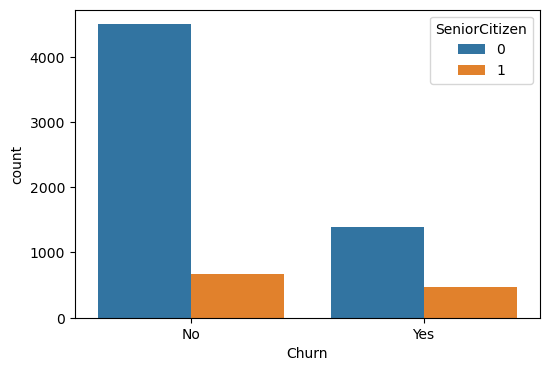

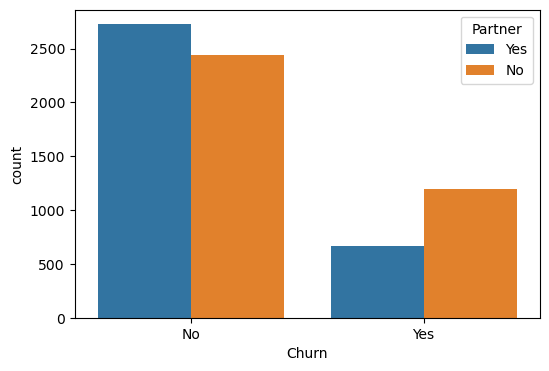

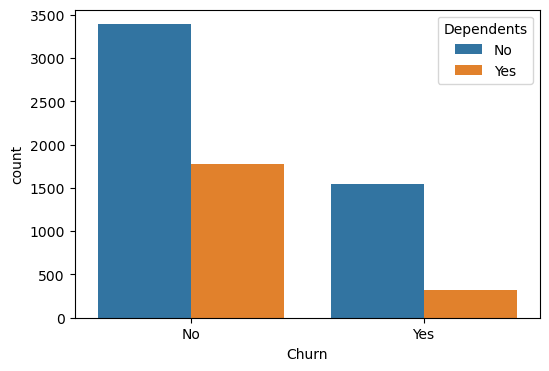

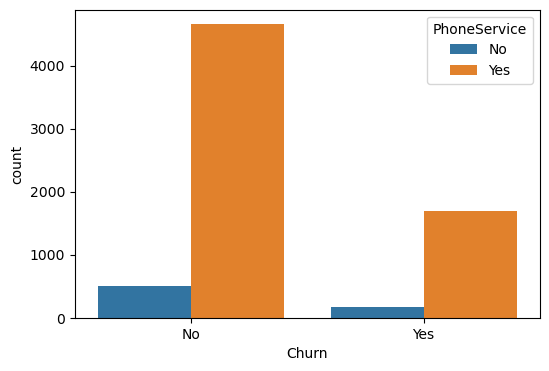

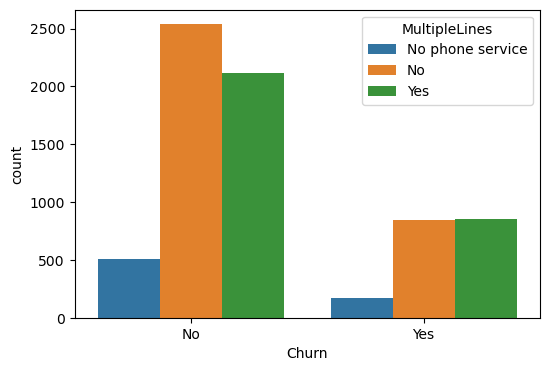

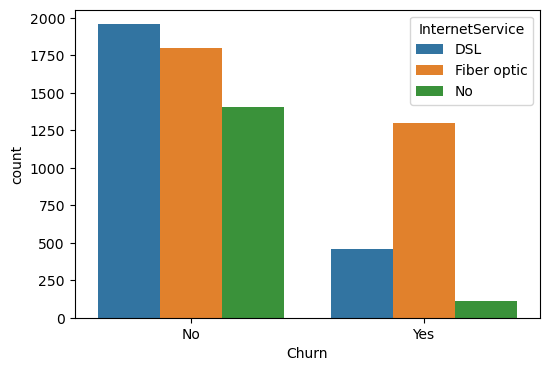

In [45]:
churning1=["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines",
          "InternetService"]
for i in churning1:
    plt.figure(figsize=(6,4))
    sns.countplot(x=churn["Churn"], hue=churn[i])
    plt.show()

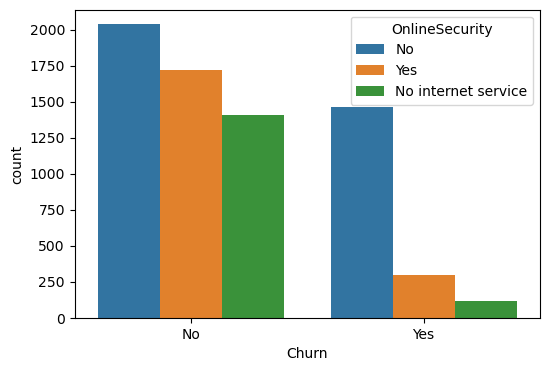

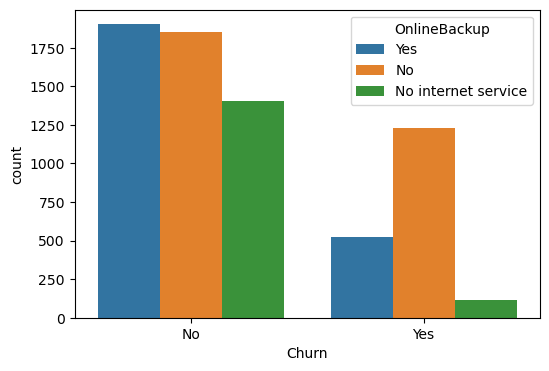

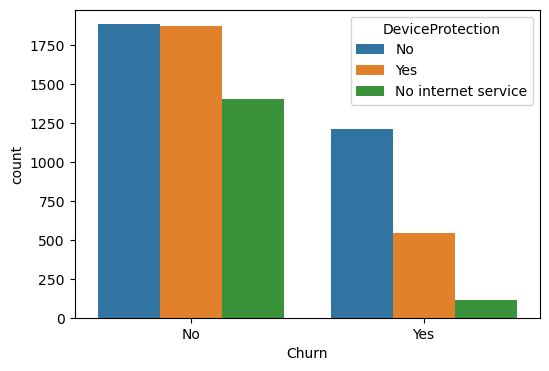

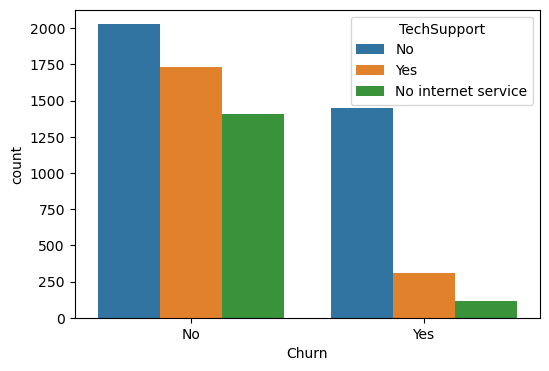

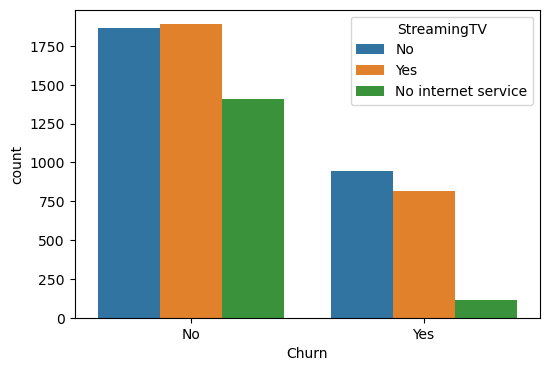

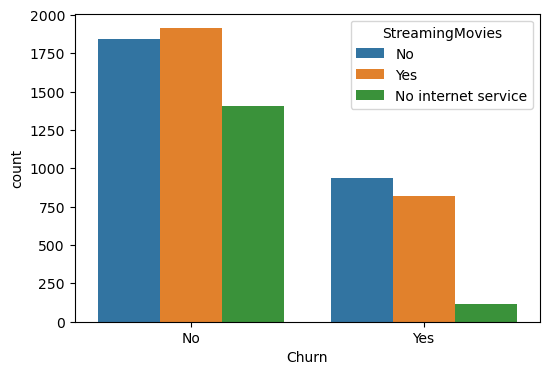

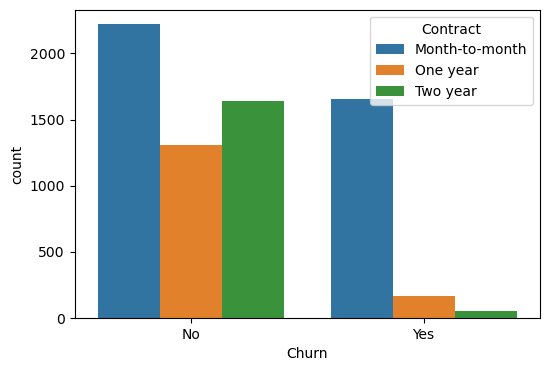

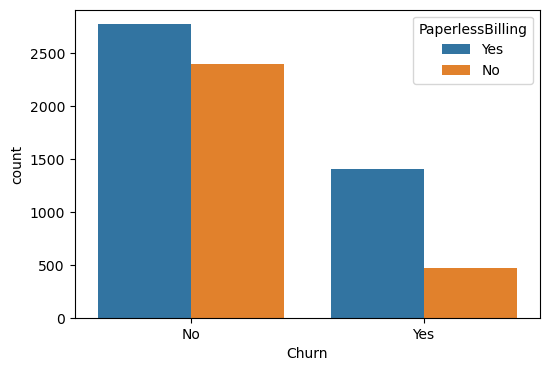

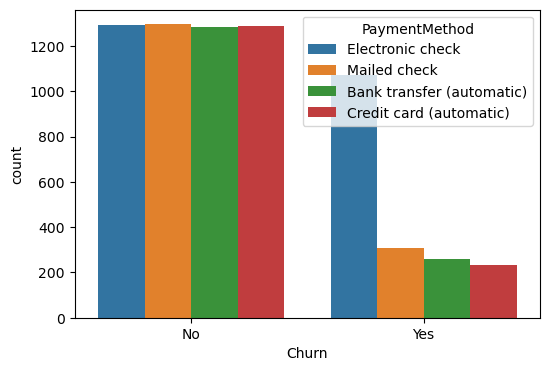

In [46]:
churning2=["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
           "Contract","PaperlessBilling","PaymentMethod"]
for i in churning2:
    plt.figure(figsize=(6,4))
    sns.countplot(x=churn["Churn"], hue=churn[i])
    plt.show()

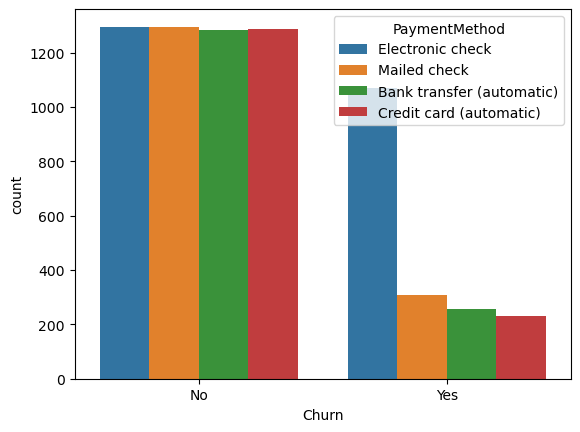

In [47]:
sns.countplot(x=churn["Churn"], hue=churn["PaymentMethod"])
plt.show()

## Multivariate Analysis

### Pairplot

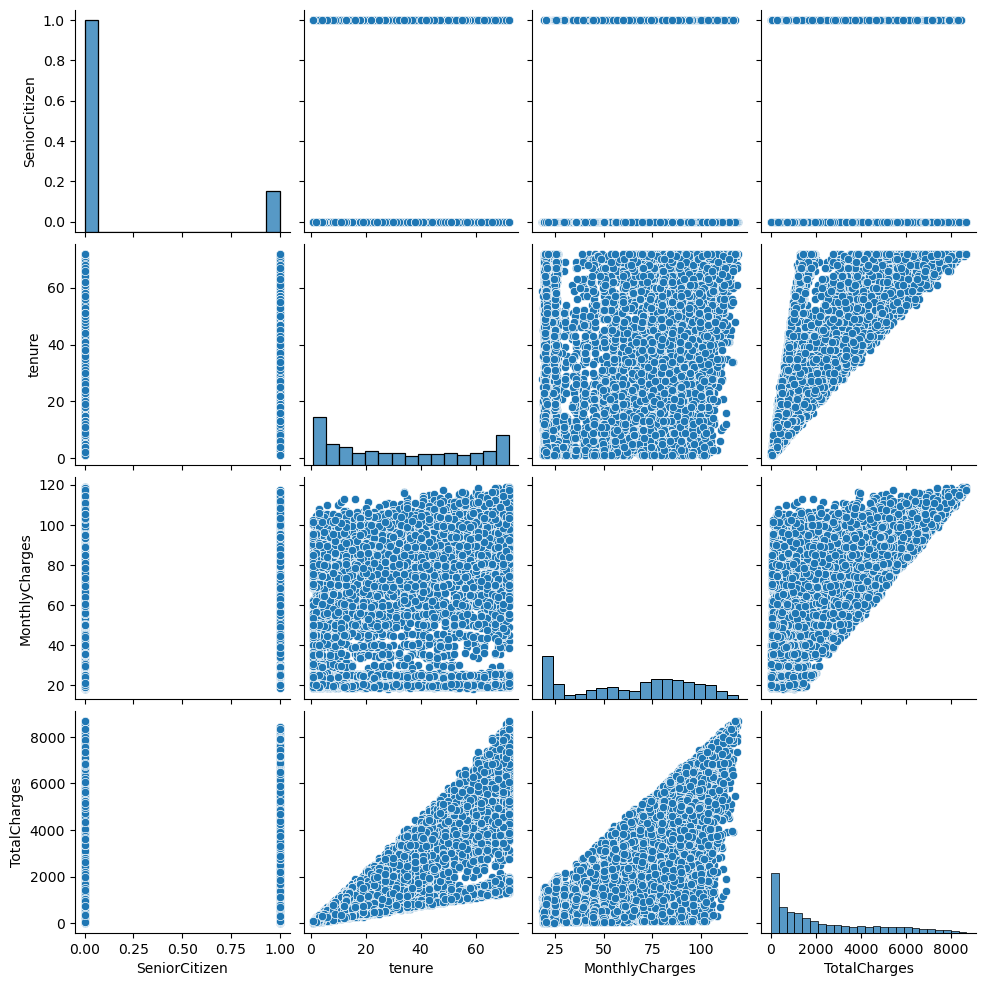

In [48]:
sns.pairplot(churn)

### Heatmap

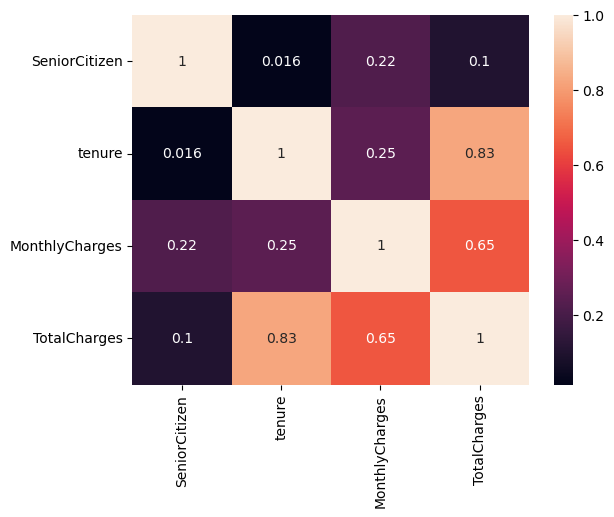

In [49]:
sns.heatmap(churn.corr(numeric_only=True), annot=True)
plt.show()